In [1]:
# installs
!python3.11 -m pip install numpy
!python3.11 -m pip install scipy
!python3.11 -m pip install matplotlib

In [2]:
import numpy as np

In [3]:
loaded = np.load("./endeavour.npz")
task1 = loaded["task1"]
task2 = loaded["task2"]
task3 = loaded["task3"]
task4 = loaded["task4"]
task6a = loaded["task6a"]
task6b = loaded["task6b"]
task7a = loaded["task7a"]
task7b = loaded["task7b"]

In [4]:
import matplotlib.pyplot as plt

# Task 1


In [5]:
def rotate_90_num(array, num):
    for i in range(num):
        array = np.rot90(array)
    return array

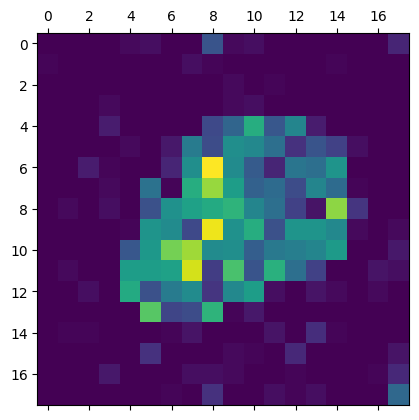

In [6]:
# reference pattern
plt.matshow(task1[0])

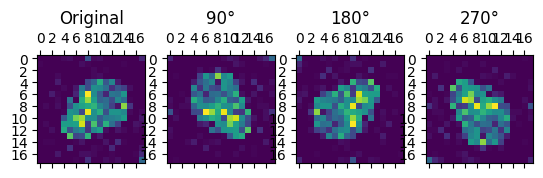

In [7]:
task_1_fig_1, axis = plt.subplots(1, 4)

axis[0].matshow(task1[0])
axis[0].set_title("Original")
axis[1].matshow(rotate_90_num(task1[0], 1))
axis[1].set_title("90°")
axis[2].matshow(rotate_90_num(task1[0], 2))
axis[2].set_title("180°")
axis[3].matshow(rotate_90_num(task1[0], 3))
axis[3].set_title("270°")

plt.show()

In [8]:
task_1_original = task1[0]
task_1_90 = rotate_90_num(task1[0], 1)
task_1_180 = rotate_90_num(task1[0], 2)
task_1_270 = rotate_90_num(task1[0], 3)

task_1_counts = [0, 0, 0, 0]

for i in task1:
    if np.array_equal(i, task_1_90):
        task_1_counts[1] += 1
    elif np.array_equal(i, task_1_180):
        task_1_counts[2] += 1
    elif np.array_equal(i, task_1_270):
        task_1_counts[3] += 1
    else:
        task_1_counts[0] += 1

task_1_counts

[6, 3, 6, 10]

# Task 2


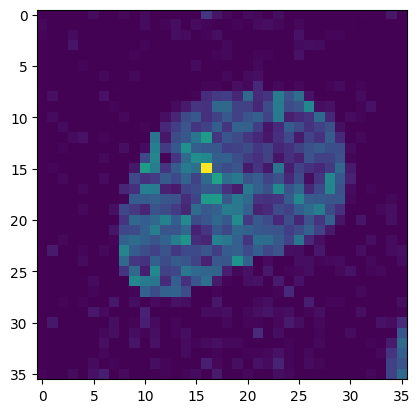

In [9]:
task_2_original_img = np.reshape(task2[0], (36, 36))
plt.imshow(task_2_original_img)

In [10]:
def reshape_img(img):
    return np.reshape(img, (36, 36))

In [11]:
task_2_original = task2[0]
task_2_90 = rotate_90_num(reshape_img(task2[0]), 1).flatten()
task_2_180 = rotate_90_num(reshape_img(task2[0]), 2).flatten()
task_2_270 = rotate_90_num(reshape_img(task2[0]), 3).flatten()

task_2_counts = [0, 0, 0, 0]

for i in task2:
    if np.array_equal(i, task_2_90):
        task_2_counts[1] += 1
    elif np.array_equal(i, task_2_180):
        task_2_counts[2] += 1
    elif np.array_equal(i, task_2_270):
        task_2_counts[3] += 1
    else:
        task_2_counts[0] += 1

task_2_counts

[22, 25, 21, 32]

# Task 3


In [12]:
np.shape(task3[0])  # = 33 ** 2

(1089,)

In [13]:
task_3_original_image = np.reshape(task3[0], (33, 33))

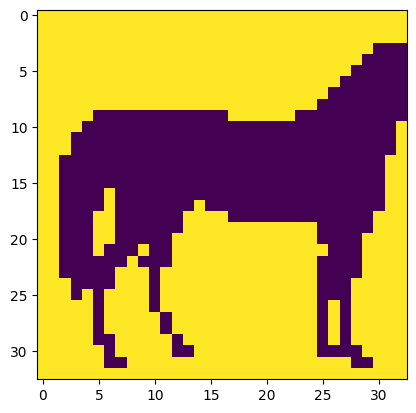

In [14]:
plt.imshow(task_3_original_image)

In [15]:
# This problem can probably be solved by repeating what we did earlier.

task_3_original = task3[0]
task_3_90 = rotate_90_num(task_3_original_image, 1).flatten()
task_3_180 = rotate_90_num(task_3_original_image, 2).flatten()
task_3_270 = rotate_90_num(task_3_original_image, 3).flatten()

In [16]:
task_3_counts = [0, 0, 0, 0]
task_3_sorting = [[], [], [], []]

for i in task3:
    if np.array_equal(i, task_3_90):
        task_3_counts[1] += 1
        task_3_sorting[1].append(i)
    elif np.array_equal(i, task_3_180):
        task_3_counts[2] += 1
        task_3_sorting[2].append(i)
    elif np.array_equal(i, task_3_270):
        task_3_counts[3] += 1
        task_3_sorting[3].append(i)
    else:
        task_3_counts[0] += 1
        task_3_sorting[0].append(i)

task_3_counts

[254, 260, 250, 236]

In [61]:
task_3_sorted = np.array(
    task_3_sorting[0] + task_3_sorting[1] + task_3_sorting[2] + task_3_sorting[3]
)

task_3_sorted

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint16)

Text(0.5, 1.0, 'Sorted')

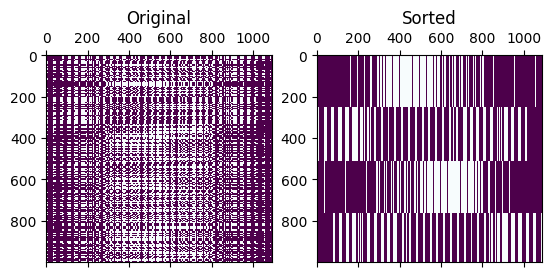

In [62]:
# Plot the design matrices

task_3_subplot, task_3_axes = plt.subplots(1, 2)

task_3_axes[0].matshow(task3, cmap="BuPu")
task_3_axes[0].set_title("Original")
task_3_axes[1].matshow(task_3_sorted, cmap="BuPu")
task_3_axes[1].set_title("Sorted")

# Task 4


In [63]:
task_4_row_sums = np.empty(1)

for i in task4:
    task_4_row_sums = np.append(task_4_row_sums, np.sum(i))

task_4_row_sums = task_4_row_sums[1:]

np.average(task_4_row_sums)

1251.047

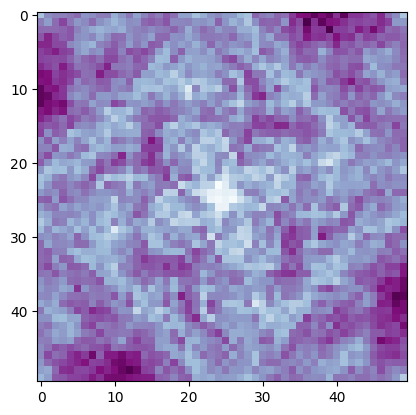

In [27]:
task_4_average_assuming = np.sum(task4, axis=0) / task4.shape[0]

plt.imshow(np.reshape(task_4_average_assuming, (50, 50)), cmap="BuPu")

Setting up K-Means


In [64]:
from sklearn.cluster import KMeans

# 4 directions, so 4 expected clusters
kmeans = KMeans(n_clusters=4, n_init=10, init="k-means++")
output_labels = kmeans.fit_predict(task4)

In [72]:
task_4_sorting = [[], [], [], []]

for i in range(task4.shape[0]):
    task_4_sorting[output_labels[i]].append(task4[i])

(250, 2500)

In [82]:
task_4_orientations = []
for i in range(4):
    task_4_orientations.append(np.array(task_4_sorting[i]))

task_4_orientations[3].shape

(254, 2500)

In [48]:
def average_img(imgs):
    return np.sum(imgs, axis=0) / imgs.shape[0]

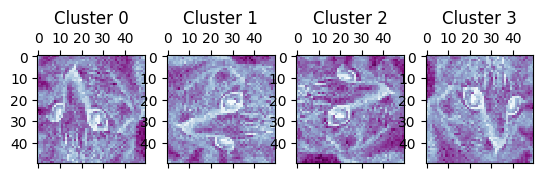

In [83]:
task_4_subplot, task_4_axes = plt.subplots(1, 4)

for i in range(4):
    task_4_axes[i].matshow(
        np.reshape(average_img(task_4_orientations[i]), (50, 50)), cmap="BuPu"
    )
    task_4_axes[i].set_title(f"Cluster {i}")

# Task 6


In [90]:
task6a.shape, task6b.shape

((1556153,), (1556153,))